In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
#this code was partially generated with the help of ChatGPT-4o-mini 

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ombelinemussat/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [6]:
articles_df = pd.read_csv("cleaned_articles_2016_2024.csv")


In [7]:
#we make a function to get sentiment scores from article text
def get_vader_sentiment(text):
    if pd.isna(text):
        return None
    scores = analyzer.polarity_scores(text)
    return scores

#and apply sentiment analysis to cleaned_text
articles_df['vader_scores'] = articles_df['cleaned_text'].apply(get_vader_sentiment)

In [8]:
print(articles_df['vader_scores'])

0       {'neg': 0.097, 'neu': 0.769, 'pos': 0.134, 'co...
1       {'neg': 0.048, 'neu': 0.889, 'pos': 0.064, 'co...
2       {'neg': 0.045, 'neu': 0.877, 'pos': 0.078, 'co...
3       {'neg': 0.003, 'neu': 0.884, 'pos': 0.113, 'co...
4       {'neg': 0.041, 'neu': 0.822, 'pos': 0.137, 'co...
                              ...                        
2527    {'neg': 0.014, 'neu': 0.836, 'pos': 0.15, 'com...
2528    {'neg': 0.012, 'neu': 0.859, 'pos': 0.129, 'co...
2529    {'neg': 0.07, 'neu': 0.806, 'pos': 0.124, 'com...
2530    {'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...
2531    {'neg': 0.053, 'neu': 0.774, 'pos': 0.173, 'co...
Name: vader_scores, Length: 2532, dtype: object


In [9]:
#and we use another function to get the negativity from the vador scores
def get_negativity(score):
    if isinstance(score, dict):
        return score.get('neg')
    return None

articles_df['negativity'] = articles_df['vader_scores'].apply(get_negativity)


In [10]:
articles_df['negativity'] 

0       0.097
1       0.048
2       0.045
3       0.003
4       0.041
        ...  
2527    0.014
2528    0.012
2529    0.070
2530    0.052
2531    0.053
Name: negativity, Length: 2532, dtype: float64

In [11]:
articles_df['article_date_created'] = pd.to_datetime(articles_df['article_date_created'], errors='coerce')

#we create a 'month' column for aggregation
articles_df['month'] = articles_df['article_date_created'].dt.to_period('M').astype(str)

#and aggregate average negativity per month
monthly_negativity = articles_df.groupby('month')['negativity'].mean().reset_index()


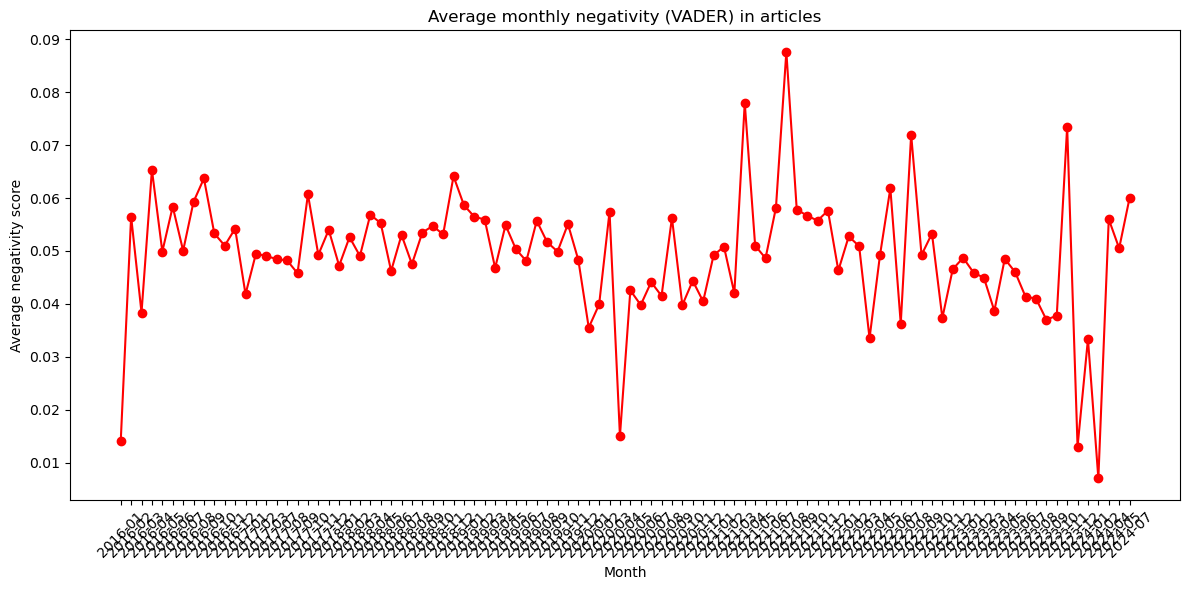

In [12]:
#to look at the average monthly negativity in articles

#and plot monthly average negativity trend
plt.figure(figsize=(12,6))
plt.plot(monthly_negativity['month'], monthly_negativity['negativity'], marker='o', color='red')
plt.xticks(rotation=45)
plt.title('Average monthly negativity (VADER) in articles')
plt.xlabel('Month')
plt.ylabel('Average negativity score')
plt.tight_layout()
plt.show()


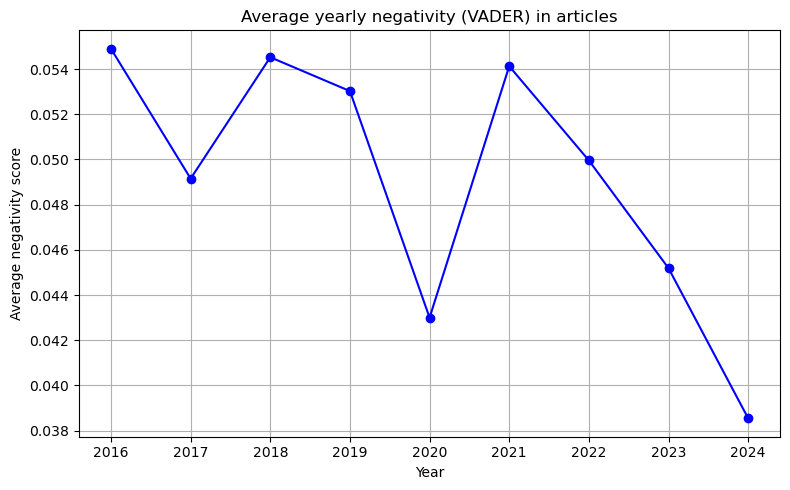

In [14]:
#to look at the average yearly negativity in articles:

#we need to extract year from article_date_created
articles_df['year'] = articles_df['article_date_created'].dt.year
#and aggregate average negativity per year
yearly_negativity = articles_df.groupby('year')['negativity'].mean().reset_index()

#and finally plot yearly average negativity trend
plt.figure(figsize=(8,5))
plt.plot(yearly_negativity['year'], yearly_negativity['negativity'], marker='o', color='blue')
plt.title('Average yearly negativity (VADER) in articles')
plt.xlabel('Year')
plt.ylabel('Average negativity score')
plt.grid(True)
plt.tight_layout()
plt.show()
